## Linear regression

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Legal Status,House Direction,Floors,Rooms,Toilets,...,Street Name_Đồng Trí 4,Street Name_Đồng Xoài,Street Name_Đỗ Quang,Street Name_Đỗ Thúc Tịnh,Street Name_Đỗ Đình Thiện,Street Name_điện biên phủ,Street Name_đại la 4,Street Name_đảo nổi,Street Name_đồng bài 2,Street Name_đồng xoài
0,10.401867,4.001773,8.062258,2.236068,-0.647076,1,3.0,1.414214,1.818446,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.401884,4.001535,8.062258,2.236068,-0.815934,1,6.0,1.414214,1.818446,1.732051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.404109,4.005330,9.486833,2.236068,0.703785,1,4.0,2.236068,2.893444,2.645751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.399711,4.005830,8.660254,2.236068,-0.309361,4,7.0,1.000000,1.443635,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.400744,4.006028,8.944272,2.236068,0.534928,5,6.0,1.000000,0.881374,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Input variables

- Practice training

In [4]:
x = df.drop(columns=["Price", "Legal Status", "Width (m)"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),House Direction,Floors,Rooms,Toilets,Furnishing Sell,Ward Name_Huyện Hòa Vang,...,Street Name_Đồng Trí 4,Street Name_Đồng Xoài,Street Name_Đỗ Quang,Street Name_Đỗ Thúc Tịnh,Street Name_Đỗ Đình Thiện,Street Name_điện biên phủ,Street Name_đại la 4,Street Name_đảo nổi,Street Name_đồng bài 2,Street Name_đồng xoài
0,10.401867,4.001773,8.062258,-0.647076,3.0,1.414214,1.818446,1.414214,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.401884,4.001535,8.062258,-0.815934,6.0,1.414214,1.818446,1.732051,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.404109,4.005330,9.486833,0.703785,4.0,2.236068,2.893444,2.645751,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.399711,4.005830,8.660254,-0.309361,7.0,1.000000,1.443635,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.400744,4.006028,8.944272,0.534928,6.0,1.000000,0.881374,1.000000,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Target variables

- Practice training

In [5]:
y = df[['Price']]
y.head()

,Price
0,-1.467406
1,-1.467329
2,-1.449948
3,-1.354036
4,-1.351444


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=500)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(3297, 1461) (825, 1461)
(3297, 1) (825, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [7]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [8]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[ 1.07608750e+01 -1.35932388e+00  3.62905759e-01 ... -5.11073808e+08
  -5.11073809e+08 -5.11073809e+08]]
Interception  :  [-1.47119259e+11]


##### Real estate price prediction

- On the train set

In [9]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[ 0.54153442],
       [-0.05331421],
       [-0.31408691],
       ...,
       [-1.07800293],
       [-0.74154663],
       [-0.10144043]])

- Prediction on validation set

In [10]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[ 7.66723633e-01],
       [ 5.11073808e+08],
       [-6.90734863e-01],
       [-7.59948730e-01],
       [-9.42962646e-01],
       [-5.23376465e-02],
       [-8.24798584e-01],
       [ 1.03149414e-01],
       [-2.84667969e-01],
       [-9.48486328e-02],
       [-6.32812500e-01],
       [ 5.11073809e+08],
       [-3.86962891e-01],
       [ 3.53363037e-01],
       [-5.72845459e-01],
       [-5.56793213e-01],
       [-1.26196289e+00],
       [-1.08087158e+00],
       [-7.77374268e-01],
       [ 1.20510864e+00],
       [-3.83972168e-01],
       [-2.35015869e-01],
       [ 3.02825928e-01],
       [ 6.43493652e-01],
       [ 5.11073809e+08],
       [-1.30908203e+00],
       [ 4.52331543e-01],
       [-9.33624268e-01],
       [-5.20507812e-01],
       [ 5.11073809e+08],
       [ 7.98645020e-02],
       [ 1.16156006e+00],
       [ 5.11073808e+08],
       [-7.67242432e-01],
       [ 4.70886230e-02],
       [ 5.11073808e+08],
       [-4.46441650e-01],
       [-3.71246338e-01],
       [-7.9

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [11]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.16875717350679684


- Validation set

In [12]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.5993936343405294e+20


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [13]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.8360933815637741


- Validation set

In [14]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: -1.817113602452825e+20


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [15]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 1.1117319003989627


- Validation set

In [16]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 2378380557.483418


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

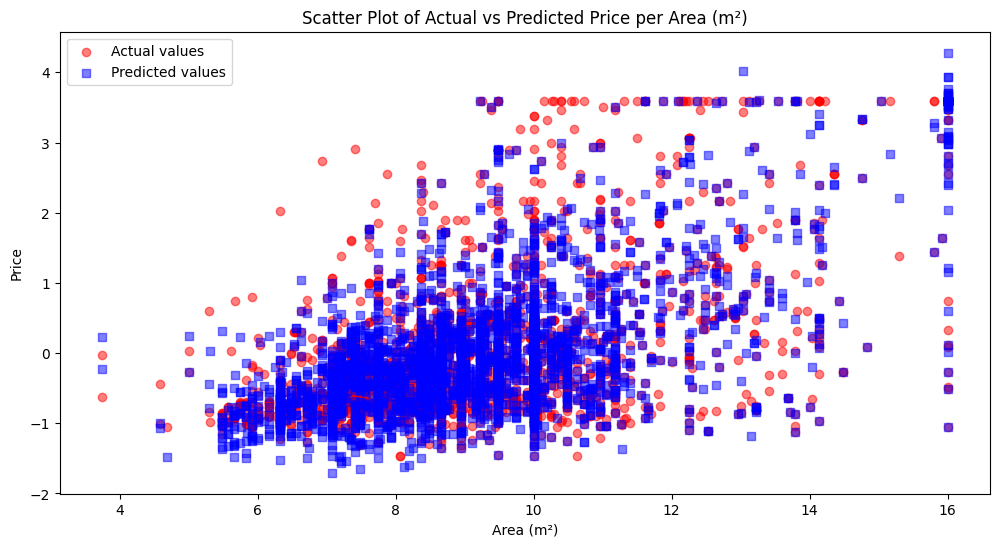

In [17]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

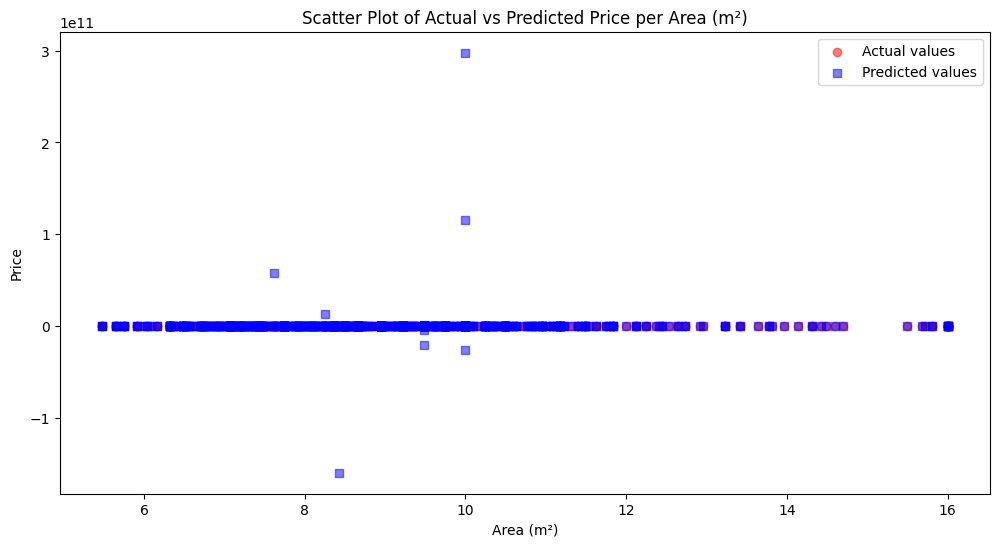

In [18]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.